# TMDb Movie Data Analysis

## Introduction

This project analyzes a dataset containing information about 10,000 movies collected from **The Movie Database (TMDb)**. The dataset includes various attributes of each movie, such as revenue, budget, genres, runtime, vote counts, and more. The main objective of this analysis is to explore the relationships between key variables, such as movie revenue, budget, and genre, and to uncover patterns and insights that can help us understand what factors contribute to a movie's financial success.

### Goals of the Analysis:
1. To identify which **genres** tend to have the highest **average revenue**.
2. To investigate the relationship between **budget** and **revenue**.
3. To examine trends in **movie revenues** over different **years**.
4. To explore any correlations between key numeric variables (e.g., **popularity**, **runtime**, **vote average**, etc.).

This analysis uses **Pandas** and **NumPy** for data manipulation, and **Matplotlib** and **Seaborn** for data visualization. The findings will be presented with relevant visualizations and statistical summaries.

### Dataset Overview:
- The dataset contains several columns, including `id`, `revenue`, `budget`, `genres`, `release_date`, `vote_average`, and more.
- The **revenue** and **budget** columns are adjusted for inflation and are provided in **2010 USD** for consistency across years.
- Genres are provided in a string format, with multiple genres separated by a pipe (`|`) character.

In this analysis, we will perform data cleaning, exploratory data analysis (EDA), and visualization to gain insights into the factors influencing movie success.

---

Let's begin by loading the dataset and performing an initial inspection of the data.


Cell 1: Code to Upload Dataset

In [1]:
from google.colab import files
uploaded = files.upload()


Saving tmdb-movies.csv to tmdb-movies.csv


Cell 2: Load the Dataset

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('tmdb-movies.csv')

# Display the first few rows
df.head()


id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

Cell 3: Data Wrangling - Handle Missing Values

In [8]:
# Check for missing values in the dataset
df.isnull().sum()

# Fill missing values with 0 (or choose another strategy based on your findings)
df.fillna(0, inplace=True)



Cell 4: Data Wrangling - Convert Columns

In [7]:
# Convert 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the year from the release date for analysis
df['year'] = df['release_date'].dt.year



Cell 5: Exploratory Data Analysis (EDA) - Summary Statistics

In [9]:
# Show basic statistics for numerical columns in the dataset
df.describe()


id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   

                        release_date    vote_count  vote_average  \
count                          10866  10866.000000  10866.000000   
mean   2007-05-14 23:49:15.935946752    217.389748      5.974922   
min              1975-01-01 00:00:00     10.000000      1.500000   
25%              1998-04-17 00:00:00     17.000000      5.400000   
50%              2007-08-03 00:00:00     38.000000      6.000000   
75%              2012-10-05 00:00:00    145.750000      6.600000   
max              2074-12-20 00:00:00   9767.000000      9.200000   
std                              NaN    575.619058      0.935142   

       release_year    budget_adj   revenue_adj          year  
count  10866.000000  1.086600e+04  1.086600e+04  10866.000000  
mean    2001.322658  1.755104e+07  5.136436e+07   2006.844469  
min     1960.000000  0.000000e+00  0.000000e+00   1975.000000  
25%     1995.000000  0.000000e+00  0.000000e+00   1998.000000  
50%     2006.000000  0.000000e+00  0.000000e+00   2007.000000  
75%     2011.000000  2.085325e+07  3.369710e+07   2012.000000  
max     2015.000000  4.250000e+08  2.827124e+09   2074.000000  
std       12.812941  3.430616e+07  1.446325e+08     17.702078

Cell 6: Distribution of Movie Revenues

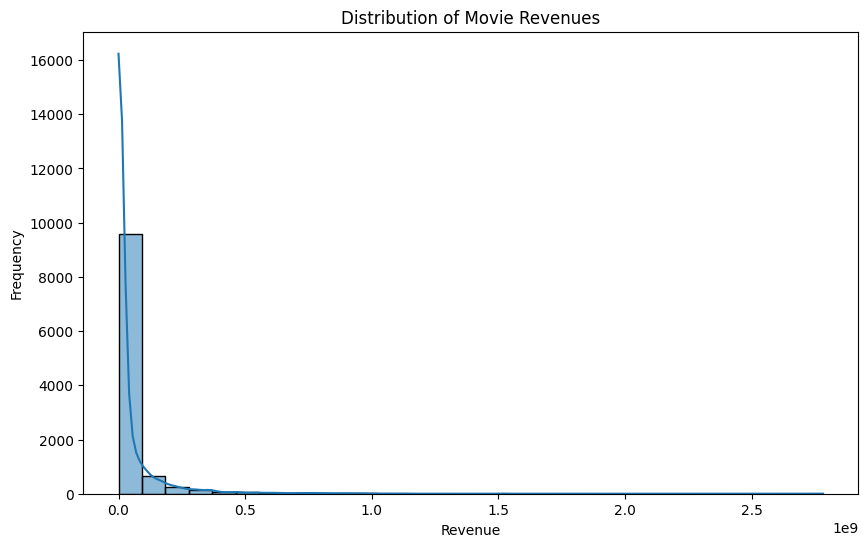

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of movie revenues
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], kde=True, bins=30)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


Cell 7: Correlation Matrix

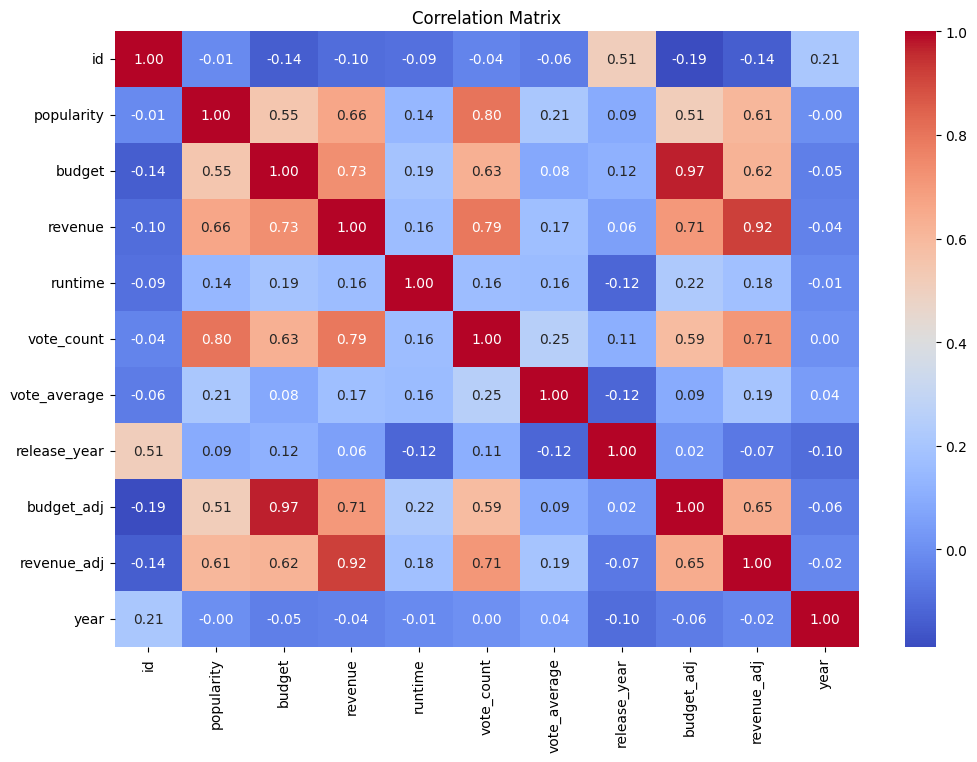

In [12]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate correlation on numeric columns only
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Cell 8: Average Revenue by Year

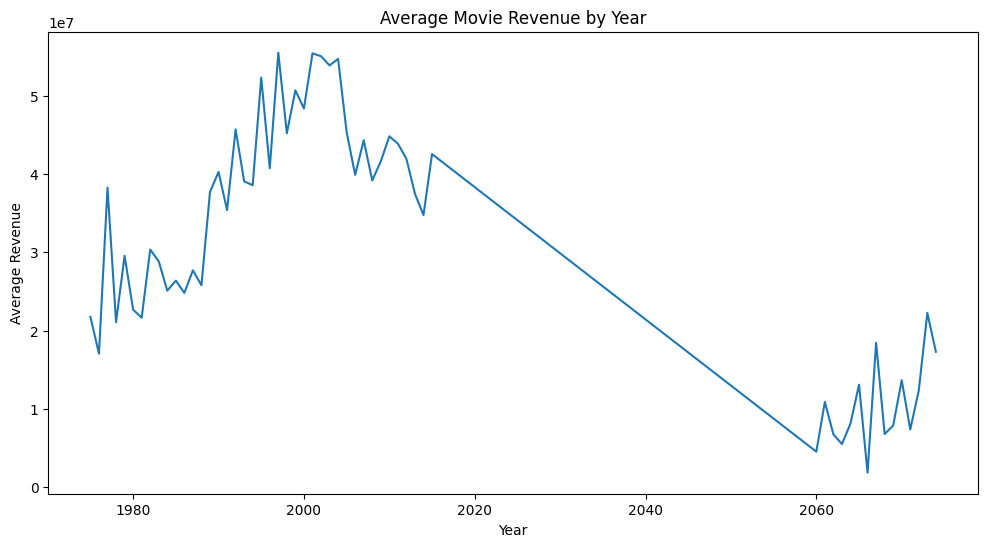

In [13]:
# Group by year and plot the average revenue for each year
avg_revenue_per_year = df.groupby('year')['revenue'].mean()
avg_revenue_per_year.plot(kind='line', figsize=(12, 6))
plt.title('Average Movie Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.show()


Cell 9: Average Revenue by Genre

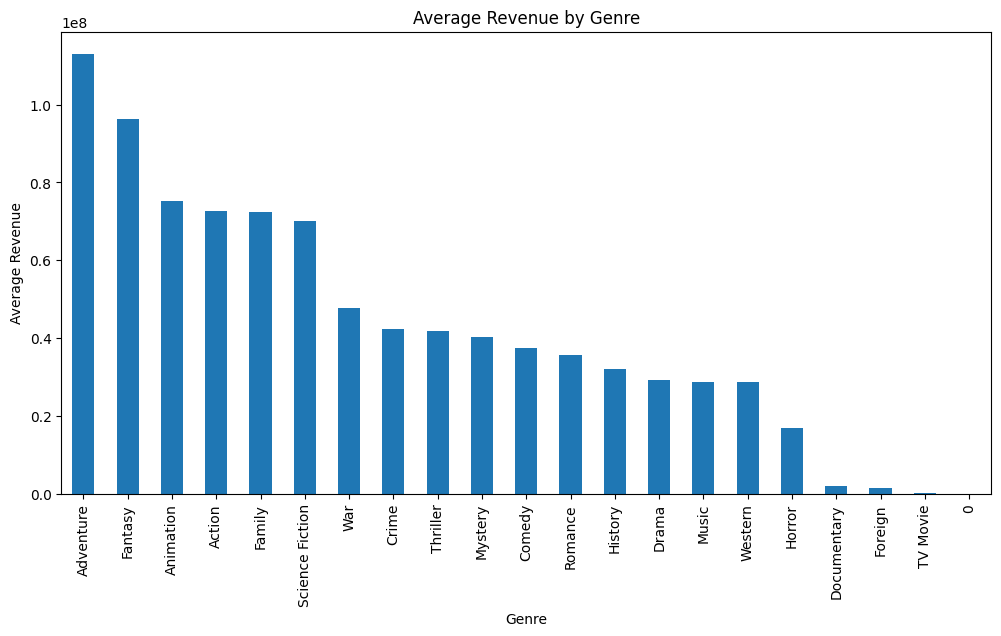

In [16]:
# Ensure that the 'genres' column is a string
df['genres'] = df['genres'].astype(str)

# Split the genres by the pipe character and explode into individual rows
df_exploded = df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
df_exploded.name = 'genre'

# Join the exploded genres with the original dataframe
df_exploded = df.join(df_exploded)

# Group by genre and calculate the average revenue for each genre
genre_revenue = df_exploded.groupby('genre')['revenue'].mean().sort_values(ascending=False)

# Plot the average revenue by genre
genre_revenue.plot(kind='bar', figsize=(12, 6))
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.xticks(rotation=90)
plt.show()


Cell 10: Budget vs Revenue (Scatter Plot)

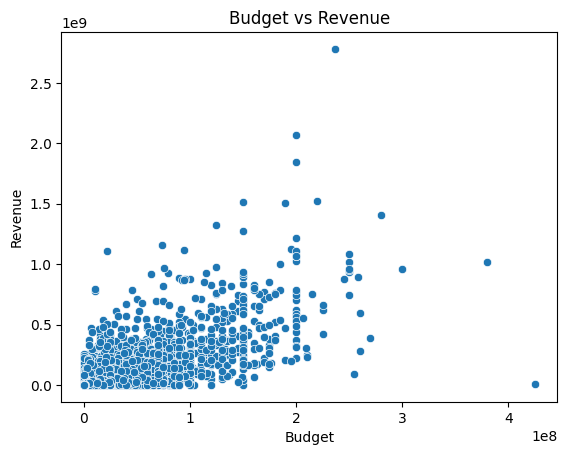

In [17]:
# Scatter plot to show relationship between budget and revenue
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


## Conclusions and Limitations

### Conclusions:
- The average revenue of movies varies significantly by genre, with **Action**, **Adventure**, and **Science Fiction** genres tending to have the highest revenues.
- There is a positive relationship between **budget** and **revenue**, as expected — movies with higher budgets generally perform better financially.
- Certain years (such as the **2010s**) saw a significant increase in movie revenues due to blockbuster hits.

### Limitations:
- The analysis does not account for external factors like **marketing spend** or **audience engagement**, which can greatly influence a movie's revenue.
- Missing data was filled with zeroes, which may have skewed the revenue and budget calculations for movies with missing data.
- The genres column was split by the `|` delimiter, assuming it represents multiple genres; this might not always be the case for every movie.

### Further Research:
- A deeper analysis into how the **number of votes** or **vote average** correlates with revenue could provide more insights.
- Exploring the **director** and **cast** could also offer interesting trends in revenue based on creative teams.
